In [4]:
import numpy as np 
import PIL
from PIL import Image
import pandas as pd
import cv2
import os
import random
from random import shuffle
from tqdm import tqdm
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data Visualization

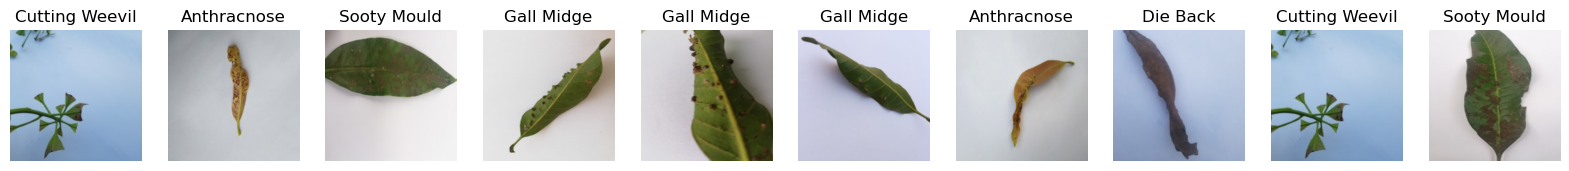

In [7]:
def visualize_dataset(data_dir, img_height, img_width, nsamples=10):
    fig, axes = plt.subplots(1, nsamples, figsize=(20, 5))
    folders = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
    for i in range(nsamples):
        folder = random.choice(folders)
        file = random.choice(os.listdir(os.path.join(data_dir, folder)))
        file_path = os.path.join(data_dir, folder, file)
        if file.endswith(('.jpg', '.png')):
            img = cv2.cvtColor(cv2.resize(cv2.imread(file_path), (img_height, img_width)), cv2.COLOR_BGR2RGB)
            axes[i].imshow(img)
            axes[i].set_title(folder)
            axes[i].axis('off')

data_dir = '/kaggle/input/mango-leaf-disease-dataset'
img_height, img_width, nsamples = 256, 256, 10
visualize_dataset(data_dir, img_height, img_width, nsamples)



# Image Classification with Pretrained Model : Resnet50

In [8]:
pt_model = tf.saved_model.load('/kaggle/input/mango-leaf-disease-resnet50/Resnet50')
categories = [ "Anthracnose" ,  "Bacterial Canker" ,  "Cutting Weevil" ,  "Die Back" ,  "Gall Midge" , 
           "Healthy" ,  "Powdery Mildew" ,  "Sooty Mould" ]

In [5]:
test=pd.read_csv('/kaggle/input/mango-leaf-disease/test.csv')
test.head()

,filename,label
0,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
1,/kaggle/input/mango-leaf-disease-dataset/Sooty...,Sooty Mould
2,/kaggle/input/mango-leaf-disease-dataset/Healt...,Healthy
3,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back
4,/kaggle/input/mango-leaf-disease-dataset/Sooty...,Sooty Mould


In [6]:
result=[]
for i in test.filename:
    img = Image.open(i).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = pt_model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])
result[:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  after removing the cwd from sys.path.


['Die Back', 'Sooty Mould', 'Healthy', 'Die Back', 'Sooty Mould']

In [7]:
test=test.assign(prediction=result)
test.head()

,filename,label,prediction
0,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back,Die Back
1,/kaggle/input/mango-leaf-disease-dataset/Sooty...,Sooty Mould,Sooty Mould
2,/kaggle/input/mango-leaf-disease-dataset/Healt...,Healthy,Healthy
3,/kaggle/input/mango-leaf-disease-dataset/Die B...,Die Back,Die Back
4,/kaggle/input/mango-leaf-disease-dataset/Sooty...,Sooty Mould,Sooty Mould


In [8]:
train=pd.read_csv('/kaggle/input/mango-leaf-disease/train.csv')
train.head()

,filename,label
0,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew
1,/kaggle/input/mango-leaf-disease-dataset/Sooty...,Sooty Mould
2,/kaggle/input/mango-leaf-disease-dataset/Healt...,Healthy
3,/kaggle/input/mango-leaf-disease-dataset/Anthr...,Anthracnose
4,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew


In [9]:
result=[]
for i in train.filename:
    img = Image.open(i).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = pt_model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])
result[:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  after removing the cwd from sys.path.


['Powdery Mildew', 'Sooty Mould', 'Healthy', 'Anthracnose', 'Powdery Mildew']

In [10]:
train=train.assign(prediction=result)
train.head()

,filename,label,prediction
0,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew,Powdery Mildew
1,/kaggle/input/mango-leaf-disease-dataset/Sooty...,Sooty Mould,Sooty Mould
2,/kaggle/input/mango-leaf-disease-dataset/Healt...,Healthy,Healthy
3,/kaggle/input/mango-leaf-disease-dataset/Anthr...,Anthracnose,Anthracnose
4,/kaggle/input/mango-leaf-disease-dataset/Powde...,Powdery Mildew,Powdery Mildew


In [11]:
print(classification_report(test['label'],test['prediction']))
res_as=accuracy_score(test['label'],test['prediction'])

                  precision    recall  f1-score   support

     Anthracnose       1.00      0.99      0.99        98
Bacterial Canker       1.00      1.00      1.00        96
  Cutting Weevil       1.00      1.00      1.00       102
        Die Back       1.00      1.00      1.00       104
      Gall Midge       0.99      1.00      1.00       101
         Healthy       0.98      1.00      0.99       104
  Powdery Mildew       1.00      1.00      1.00        99
     Sooty Mould       1.00      0.98      0.99        96

        accuracy                           1.00       800
       macro avg       1.00      1.00      1.00       800
    weighted avg       1.00      1.00      1.00       800



In [12]:
batch_size=128
img_height=240
img_width=320

In [9]:
print(categories)
num_cats = len(categories)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [14]:
ds_train = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/mango-leaf-disease-dataset',
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  

ds_val = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/mango-leaf-disease-dataset',
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 3600 files for training.
Found 4000 files belonging to 8 classes.
Using 400 files for validation.


# Basic CNN Layers and various activation functions

# CNN with RELU Act. Fn 

In [15]:
cnn_model_1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_cats)
])

In [16]:
cnn_model_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 240, 320, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 240, 320, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 160, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 160, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 80, 64)        1

In [18]:
epochs=5
his_cnn_md1=cnn_model_1.fit(ds_train,validation_data=ds_val,epochs=epochs)

Epoch 1/5
29/29 [==============================] - 182s 6s/step - loss: 1.9834 - accuracy: 0.3644 - val_loss: 1.1188 - val_accuracy: 0.5375
Epoch 2/5
29/29 [==============================] - 180s 6s/step - loss: 0.9218 - accuracy: 0.6528 - val_loss: 0.9272 - val_accuracy: 0.6625
Epoch 3/5
29/29 [==============================] - 179s 6s/step - loss: 0.6272 - accuracy: 0.7753 - val_loss: 0.6741 - val_accuracy: 0.7175
Epoch 4/5
29/29 [==============================] - 179s 6s/step - loss: 0.4064 - accuracy: 0.8558 - val_loss: 0.4859 - val_accuracy: 0.8300
Epoch 5/5
29/29 [==============================] - 180s 6s/step - loss: 0.2270 - accuracy: 0.9294 - val_loss: 0.3888 - val_accuracy: 0.8525


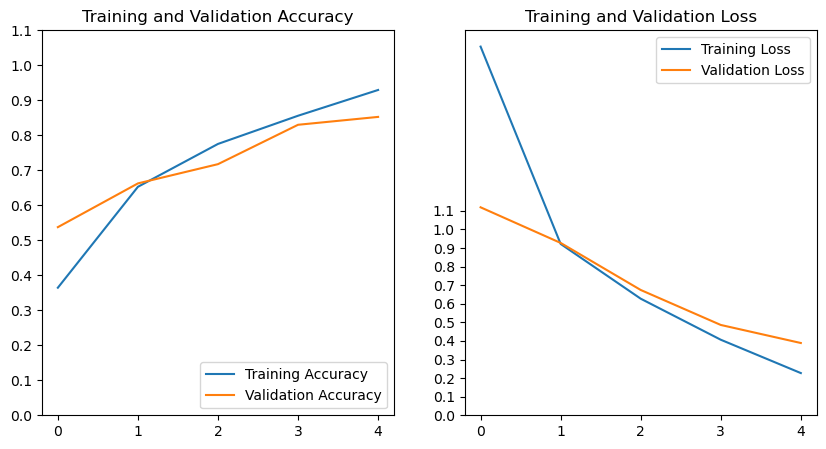

In [19]:
acc1 = his_cnn_md1.history['accuracy']
val_acc1 = his_cnn_md1.history['val_accuracy']

loss1 = his_cnn_md1.history['loss']
val_loss1 = his_cnn_md1.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Training Loss')
plt.plot(epochs_range, val_loss1, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# CNN with Tanh Act. Fn

In [20]:
cnn_model_2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='tanh'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='tanh'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='tanh'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='tanh'),
  layers.Dense(num_classes)
])

In [21]:
cnn_model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 240, 320, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 240, 320, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 120, 160, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 120, 160, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 60, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 80, 64)       

In [23]:
epochs=5
his_cnn_md2=cnn_model_2.fit(ds_train,validation_data=ds_val,epochs=epochs)

Epoch 1/5
29/29 [==============================] - 189s 6s/step - loss: 4.3251 - accuracy: 0.1517 - val_loss: 2.9482 - val_accuracy: 0.2625
Epoch 2/5
29/29 [==============================] - 188s 6s/step - loss: 2.1706 - accuracy: 0.3053 - val_loss: 1.8558 - val_accuracy: 0.2550
Epoch 3/5
29/29 [==============================] - 189s 6s/step - loss: 1.8073 - accuracy: 0.2917 - val_loss: 1.7668 - val_accuracy: 0.3675
Epoch 4/5
29/29 [==============================] - 188s 6s/step - loss: 1.7071 - accuracy: 0.3661 - val_loss: 1.6503 - val_accuracy: 0.3600
Epoch 5/5
29/29 [==============================] - 189s 6s/step - loss: 1.6351 - accuracy: 0.3703 - val_loss: 1.5762 - val_accuracy: 0.4625


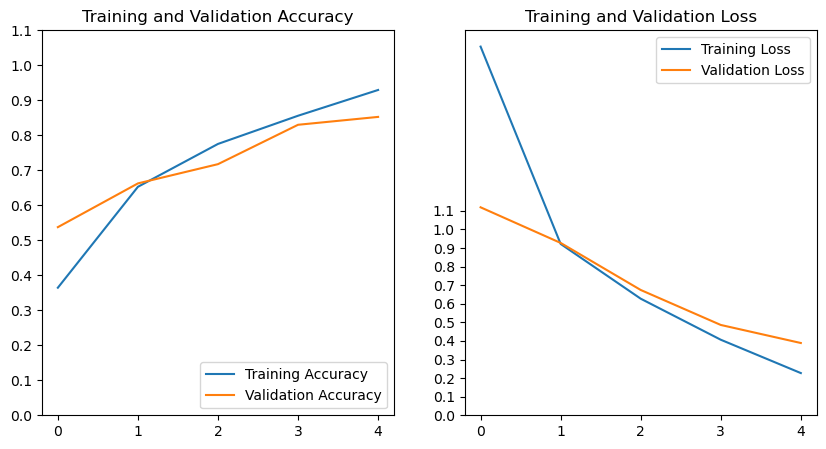

In [24]:
acc2 = his_cnn_md2.history['accuracy']
val_acc2 = his_cnn_md2.history['val_accuracy']

loss2 = his_cnn_md2.history['loss']
val_loss2 = his_cnn_md2.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Training Loss')
plt.plot(epochs_range, val_loss1, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# CNN with Softmax Act. Fn

In [25]:
cnn_model_3 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='softmax'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])


cnn_model_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [26]:
cnn_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 240, 320, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 240, 320, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 120, 160, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 120, 160, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 60, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 80, 64)       

In [27]:
epochs=5
his_cnn_md3=cnn_model_3.fit(ds_train,validation_data=ds_val,epochs=epochs)

Epoch 1/5
29/29 [==============================] - 216s 7s/step - loss: 2.0821 - accuracy: 0.1194 - val_loss: 2.0865 - val_accuracy: 0.1225
Epoch 2/5
29/29 [==============================] - 215s 7s/step - loss: 2.0814 - accuracy: 0.1253 - val_loss: 2.0858 - val_accuracy: 0.1225
Epoch 3/5
29/29 [==============================] - 215s 7s/step - loss: 2.0806 - accuracy: 0.1253 - val_loss: 2.0840 - val_accuracy: 0.1225
Epoch 4/5
29/29 [==============================] - 217s 7s/step - loss: 2.0801 - accuracy: 0.1253 - val_loss: 2.0834 - val_accuracy: 0.1225
Epoch 5/5
29/29 [==============================] - 216s 7s/step - loss: 2.0798 - accuracy: 0.1253 - val_loss: 2.0830 - val_accuracy: 0.1225


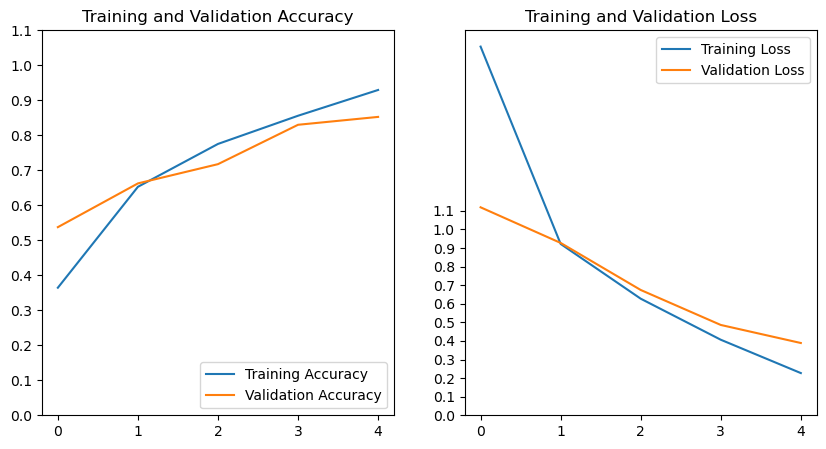

In [28]:
acc3 = his_cnn_md3.history['accuracy']
val_acc3 = his_cnn_md3.history['val_accuracy']

loss3 = his_cnn_md3.history['loss']
val_loss3 = his_cnn_md3.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Training Loss')
plt.plot(epochs_range, val_loss1, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# CNN with Sigmoid Act fn

In [29]:
cnn_model_4 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])


cnn_model_4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [30]:
cnn_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 240, 320, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 240, 320, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 120, 160, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 120, 160, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 60, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 80, 64)       

In [31]:

epochs=5
his_cnn_md4=cnn_model_4.fit(ds_train,validation_data=ds_val,epochs=epochs)

Epoch 1/5
29/29 [==============================] - 192s 7s/step - loss: 2.7316 - accuracy: 0.1217 - val_loss: 2.3215 - val_accuracy: 0.1425
Epoch 2/5
29/29 [==============================] - 191s 7s/step - loss: 2.1730 - accuracy: 0.1250 - val_loss: 2.0950 - val_accuracy: 0.1075
Epoch 3/5
29/29 [==============================] - 191s 7s/step - loss: 2.0840 - accuracy: 0.1189 - val_loss: 2.0816 - val_accuracy: 0.1225
Epoch 4/5
29/29 [==============================] - 190s 7s/step - loss: 2.0829 - accuracy: 0.1117 - val_loss: 2.0806 - val_accuracy: 0.1225
Epoch 5/5
29/29 [==============================] - 192s 7s/step - loss: 2.0827 - accuracy: 0.1156 - val_loss: 2.0840 - val_accuracy: 0.1075


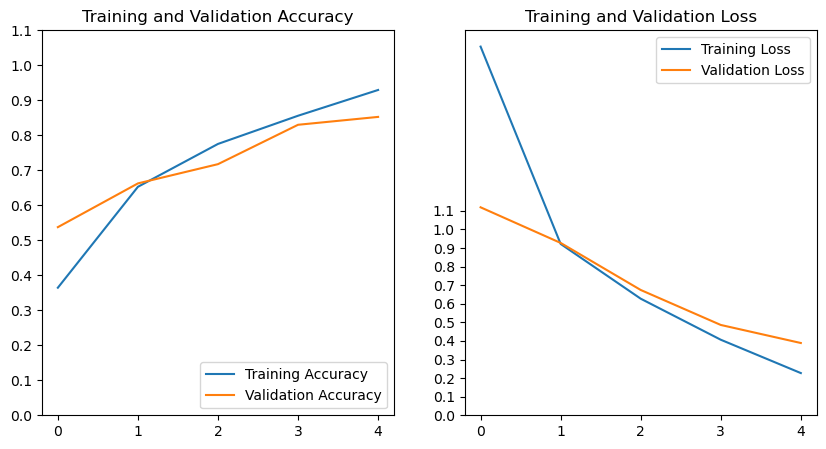

In [32]:
acc4 = his_cnn_md4.history['accuracy']
val_acc4 = his_cnn_md4.history['val_accuracy']

loss4 = his_cnn_md4.history['loss']
val_loss4 = his_cnn_md4.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Training Loss')
plt.plot(epochs_range, val_loss1, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# CNN with ELU Act Fn

In [33]:
cnn_model_5 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='elu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='elu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='elu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='elu'),
  layers.Dense(num_classes)
])


cnn_model_5.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [34]:
cnn_model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 240, 320, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 240, 320, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 120, 160, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 120, 160, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 60, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 80, 64)       

In [35]:
epochs=5
his_cnn_md5=cnn_model_5.fit(ds_train,validation_data=ds_val,epochs=epochs)

Epoch 1/5
29/29 [==============================] - 205s 7s/step - loss: 5.4169 - accuracy: 0.2292 - val_loss: 2.0346 - val_accuracy: 0.2875
Epoch 2/5
29/29 [==============================] - 206s 7s/step - loss: 1.4744 - accuracy: 0.4447 - val_loss: 1.2332 - val_accuracy: 0.5875
Epoch 3/5
29/29 [==============================] - 205s 7s/step - loss: 1.1027 - accuracy: 0.5883 - val_loss: 1.0593 - val_accuracy: 0.6050
Epoch 4/5
29/29 [==============================] - 203s 7s/step - loss: 0.8156 - accuracy: 0.7150 - val_loss: 0.7650 - val_accuracy: 0.7375
Epoch 5/5
29/29 [==============================] - 205s 7s/step - loss: 0.6595 - accuracy: 0.7733 - val_loss: 0.7044 - val_accuracy: 0.7325


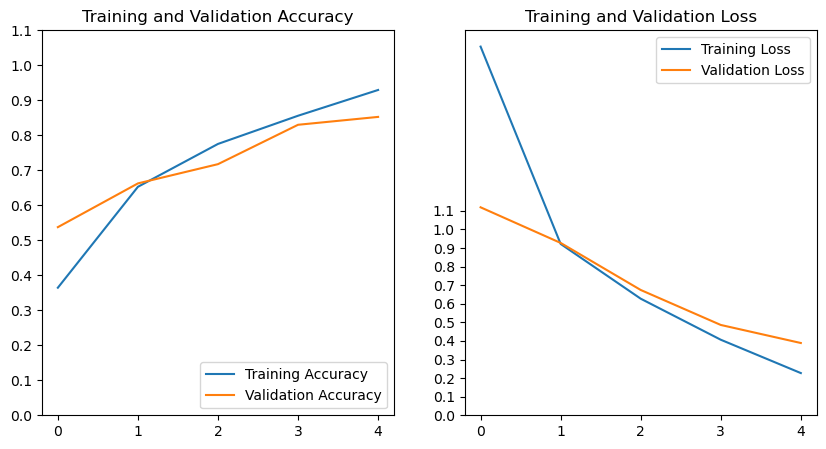

In [36]:
acc5 = his_cnn_md5.history['accuracy']
val_acc5 = his_cnn_md5.history['val_accuracy']

loss5 = his_cnn_md5.history['loss']
val_loss5 = his_cnn_md5.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Training Loss')
plt.plot(epochs_range, val_loss1, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Random Forest

In [37]:
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

data = []
labels = []

# Map class names to integer labels
data_dir = '/kaggle/input/mango-leaf-disease-dataset'
class_names = sorted(os.listdir(data_dir))
categories = {class_names[i]: i for i in range(len(class_names))}
print(categories)

# Load images and corresponding labels
for i in class_names:
    image_files = glob.glob(os.path.join(data_dir, i, '*.jpg'))
    for j in image_files:
        image = tf.keras.preprocessing.image.load_img(j, color_mode='rgb', target_size=(240, 320))
        image = np.array(image)
        data.append(image)
        labels.append(classes[i])

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)
#print(data.shape)
#print(labels)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

{'Anthracnose': 0, 'Bacterial Canker': 1, 'Cutting Weevil': 2, 'Die Back': 3, 'Gall Midge': 4, 'Healthy': 5, 'Powdery Mildew': 6, 'Sooty Mould': 7}
(3200, 240, 320, 3) (800, 240, 320, 3) (3200,) (800,)


In [38]:
np.unique(y_train)
nsamples, nx, ny, nz = X_train.shape
X_train_modified = X_train.reshape((nsamples,nx*ny*nz))
nsamples, nx, ny, nz = X_test.shape
X_test_modified = X_test.reshape((nsamples,nx*ny*nz))

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(verbose = 1,n_estimators=150,max_depth=5)
model.fit(X_train_modified,y_train)
y_pred=model.predict(X_test_modified)
rfc_as=accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
confusion_matrix(y_pred,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.0min finished


              precision    recall  f1-score   support

           0       0.77      0.77      0.77       124
           1       0.86      0.64      0.74       115
           2       0.90      0.95      0.93       106
           3       0.83      0.88      0.85        96
           4       0.47      0.64      0.54        76
           5       0.78      0.71      0.74        99
           6       0.79      0.82      0.80        88
           7       0.55      0.53      0.54        96

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.76      0.74      0.75       800



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.1s finished


array([[ 95,   5,   5,   7,   4,   1,   1,   6],
       [  6,  74,   0,   6,  14,   3,   4,   8],
       [  2,   0, 101,   3,   0,   0,   0,   0],
       [  3,   2,   6,  84,   0,   0,   0,   1],
       [  3,   3,   0,   1,  49,   3,   3,  14],
       [  5,   0,   0,   0,  11,  70,   5,   8],
       [  0,   0,   0,   0,   9,   2,  72,   5],
       [  9,   2,   0,   0,  17,  11,   6,  51]])

# Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train_modified,y_train)
y_pred_dtc=dtc.predict(X_test_modified)
dtc_as=accuracy_score(y_test,y_pred_dtc)
print(classification_report(y_test,y_pred_dtc))
confusion_matrix(y_test,y_pred_dtc)

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       123
           1       0.69      0.78      0.73        86
           2       0.90      0.99      0.94       112
           3       0.88      0.83      0.86       101
           4       0.52      0.43      0.47       104
           5       0.61      0.69      0.65        90
           6       0.62      0.62      0.62        91
           7       0.46      0.47      0.47        93

    accuracy                           0.69       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.69      0.69      0.69       800



array([[ 82,   4,   5,   5,  10,   3,   8,   6],
       [  4,  67,   0,   3,   6,   0,   3,   3],
       [  0,   0, 111,   1,   0,   0,   0,   0],
       [  4,   4,   6,  84,   2,   0,   0,   1],
       [  6,  10,   0,   1,  45,  14,   9,  19],
       [  2,   1,   1,   0,   8,  62,   5,  11],
       [  6,   4,   0,   0,   3,  10,  56,  12],
       [  7,   7,   0,   1,  12,  12,  10,  44]])

# Comparision of Various Activation Function (CNN), Random forest and Decision Tree.

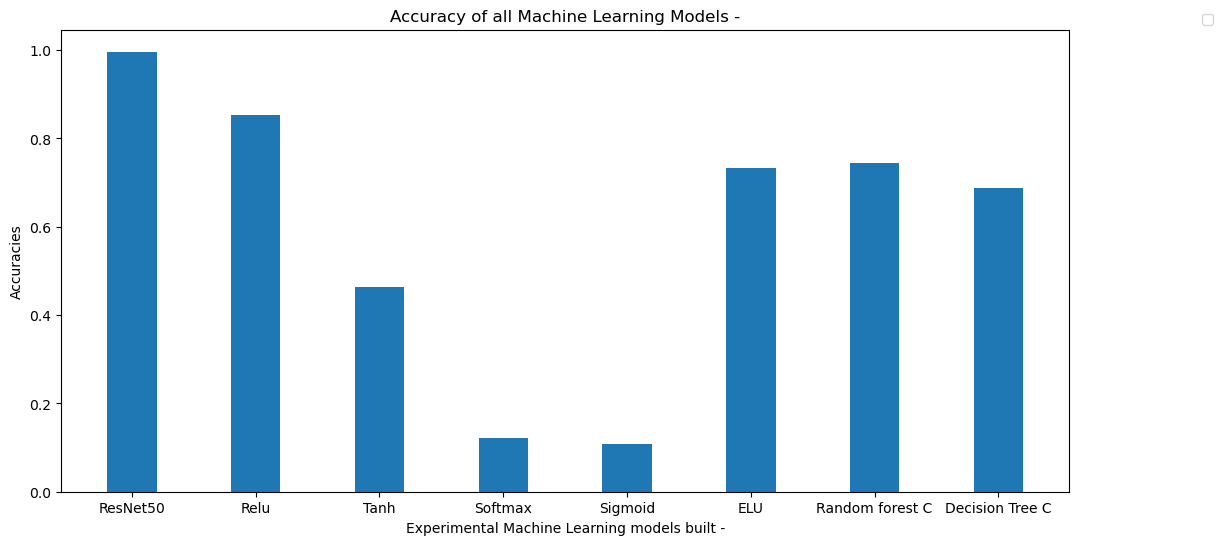

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

models = ['ResNet50','Relu','Tanh', 'Softmax', 'Sigmoid','ELU','Random forest C','Decision Tree C' ]
accuracies = [res_as,val_acc1[len(val_acc1)-1],val_acc2[len(val_acc2)-1],val_acc3[len(val_acc3)-1],val_acc4[len(val_acc4)-1],val_acc5[len(val_acc5)-1],rfc_as,dtc_as]
X_axis = np.arange(len(models))
fig = plt.figure(figsize = (13, 6))
 
# creating the bar plot
plt.bar(X_axis, accuracies, width = 0.4)
plt.xticks(X_axis, models)
plt.xlabel("Experimental Machine Learning models built -")
plt.ylabel("Accuracies")
plt.title("Accuracy of all Machine Learning Models -")
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()